In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
telco = pd.read_excel(r"C:\Users\Manjari\OneDrive - instancia consultancy\Tajamul\Telco-Customer-Churn.csv.xlsx")
telco.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
telco.shape

(7043, 21)

In [4]:
telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
telco.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


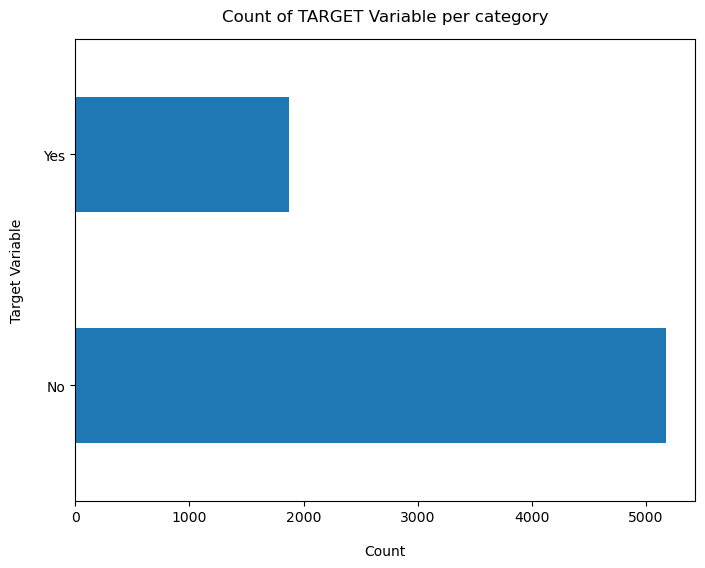

In [7]:
telco['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [8]:
100*telco['Churn'].value_counts()/len(telco['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [9]:
telco['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [10]:
telco.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
missing = pd.DataFrame((telco.isnull().sum())*100/telco.shape[0]).reset_index()
missing


,index,0
0,customerID,0.0
1,gender,0.0
2,SeniorCitizen,0.0
3,Partner,0.0
4,Dependents,0.0
5,tenure,0.0
6,PhoneService,0.0
7,MultipleLines,0.0
8,InternetService,0.0
9,OnlineSecurity,0.0


In [12]:
missing = (
    telco.isnull().mean().mul(100)
    .reset_index()
    .rename(columns={'index': 'Column', 0: 'MissingPercent'})
)
missing

,Column,MissingPercent
0,customerID,0.0
1,gender,0.0
2,SeniorCitizen,0.0
3,Partner,0.0
4,Dependents,0.0
5,tenure,0.0
6,PhoneService,0.0
7,MultipleLines,0.0
8,InternetService,0.0
9,OnlineSecurity,0.0


Text(0.5, 1.0, 'Percentage of Missing values')

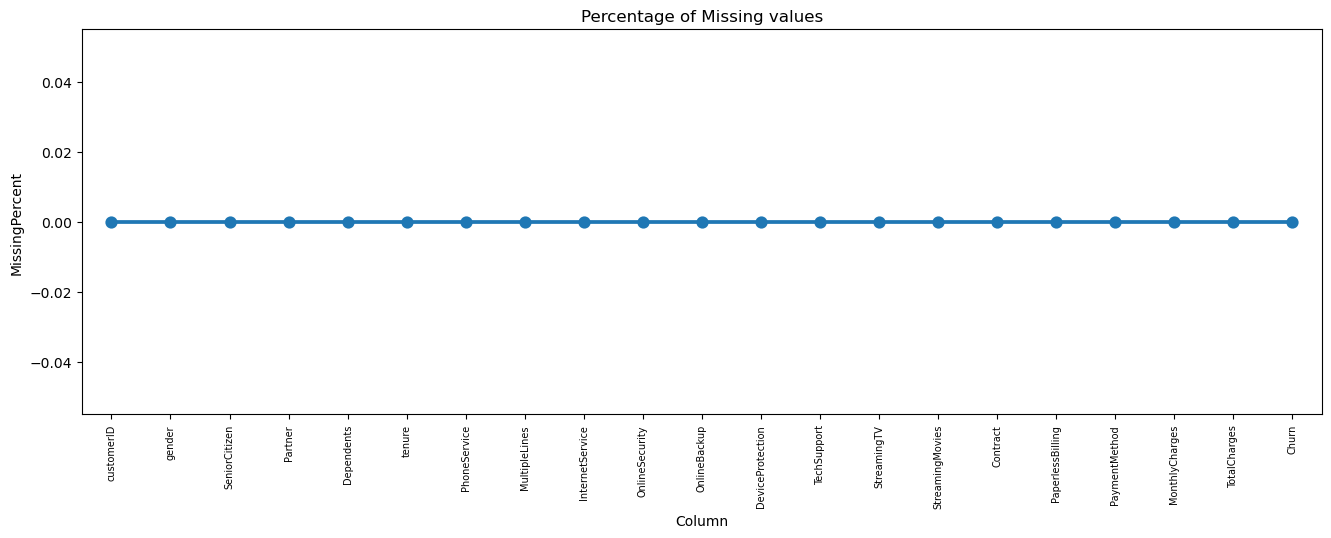

In [13]:
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='Column', y='MissingPercent', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")


'''Missing Data - Initial Intuition
Here, we don't have any missing data.
General Thumb Rules:

For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, 
depending on the feature.
For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, 
if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, 
will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.'''

In [ ]:
#Data Cleaning 

In [75]:
#Create a copy of base data for manupulation & processing
telco_data = telco.copy()

In [77]:
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')
telco_data.isnull().sum()



customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [79]:
telco_data.loc[telco_data ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [81]:
missing_count = telco_data['TotalCharges'].isna().sum()
total_count = telco_data.shape[0]




In [83]:
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [85]:
percent_missing = (missing_count / total_count) * 100
print(percent_missing)

0.1561834445548772


In [ ]:
#Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [87]:
#Removing missing values 
telco_data.dropna(how = 'any', inplace = True)

#telco_data.fillna(0)

In [89]:
telco_data.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
'''5. Divide customers into bins based on tenure 
e.g. for tenure < 12 months: assign a tenure group if 1-12, f
or tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [91]:
# Group the tenure in bins of 12 months
labels = [f"{i} - {i+11}" for i in range(1, 72, 12)]


telco_data['tenure_group'] = pd.cut(telco_data.tenure, range(1, 80, 12), right=False, labels=labels)

In [93]:
telco_data['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

In [ ]:
#6. Remove columns not required for processing

In [95]:
#drop column customerID and tenure
telco_data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [ ]:
#Data Exploration
#*1. ** Plot distibution of individual predictors by churn

In [ ]:
#Univariate Analysis

In [ ]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')
   

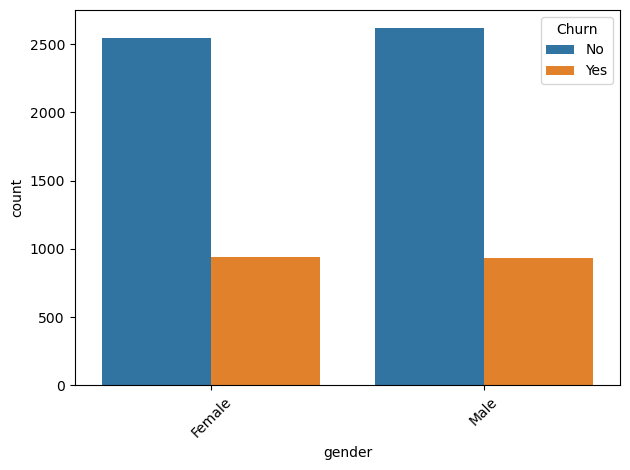

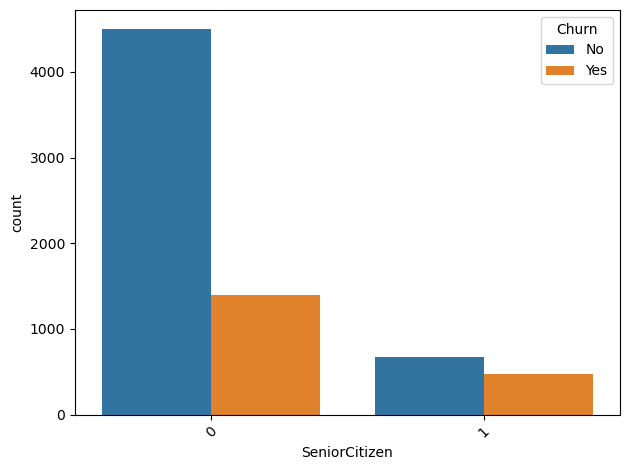

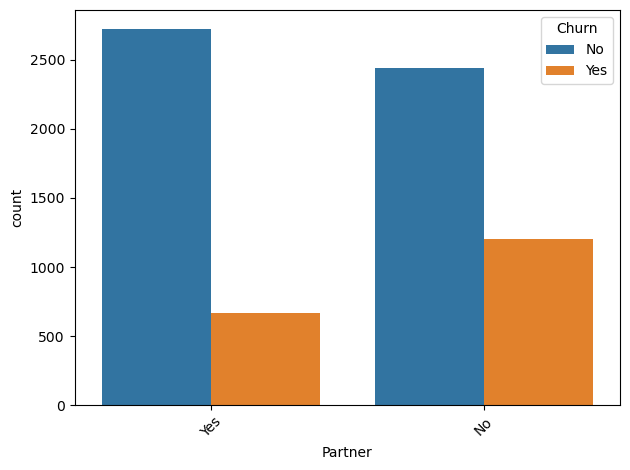

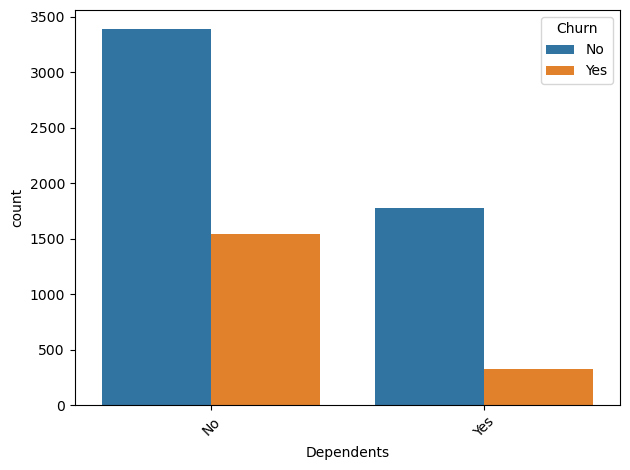

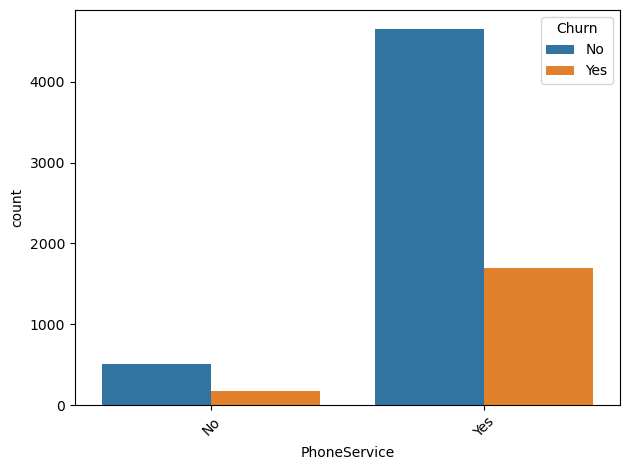

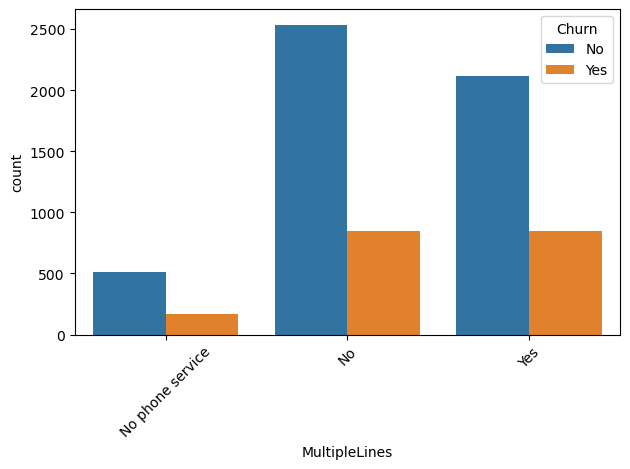

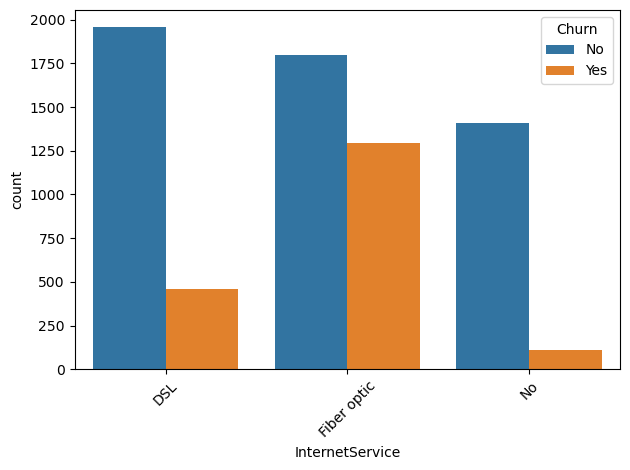

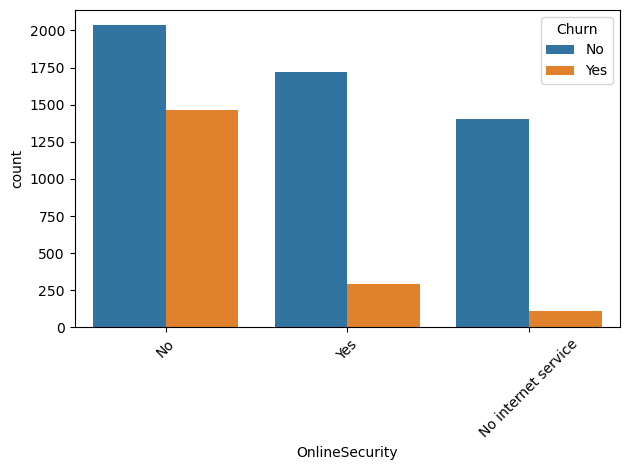

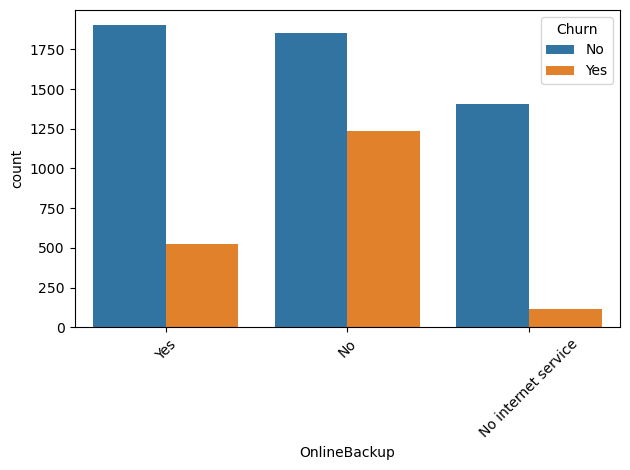

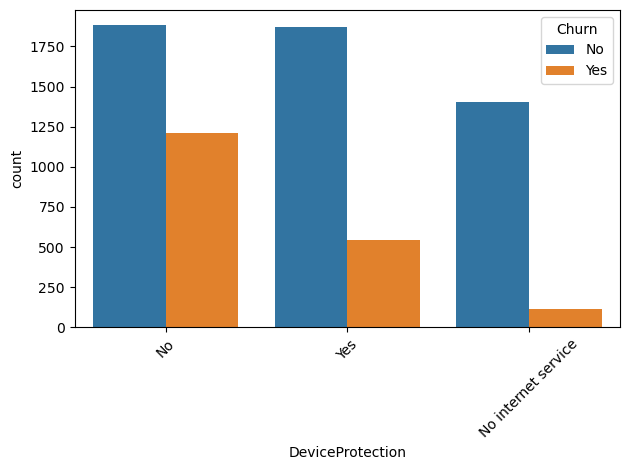

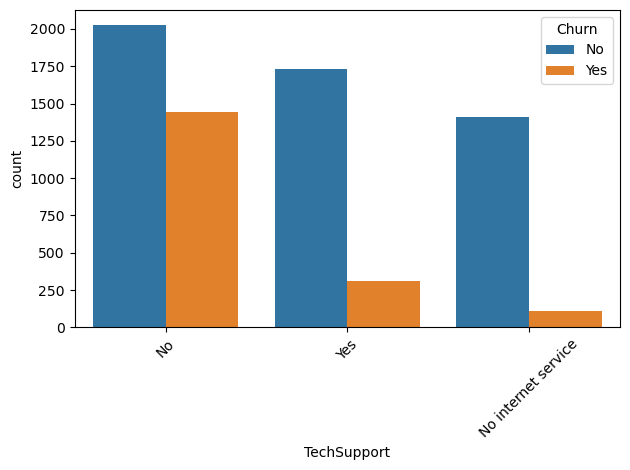

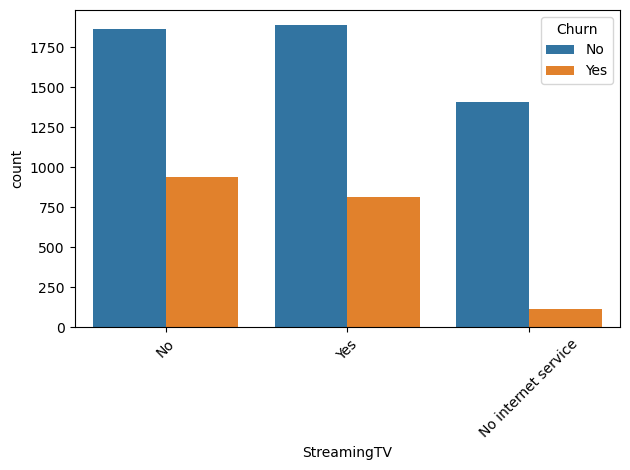

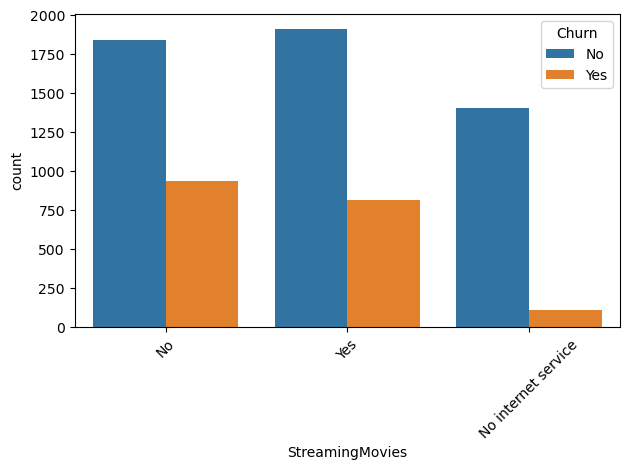

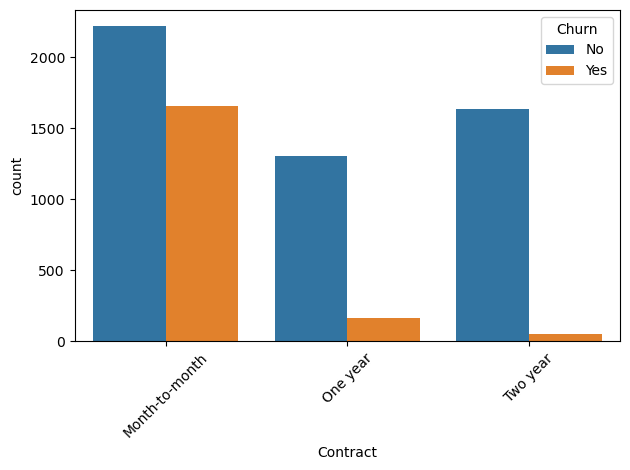

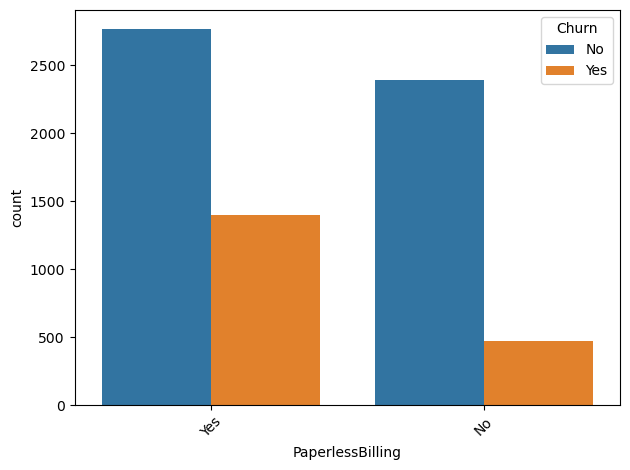

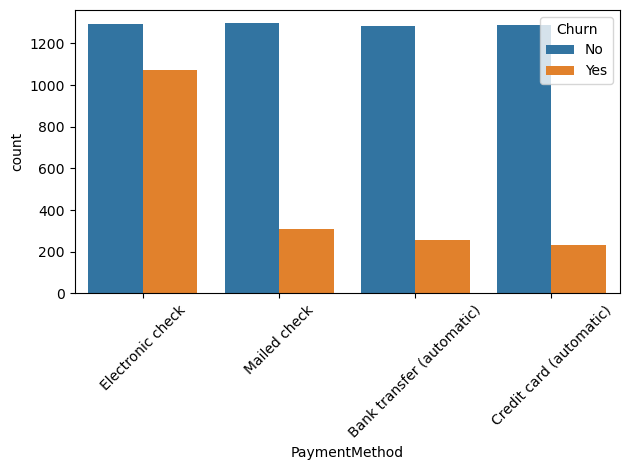

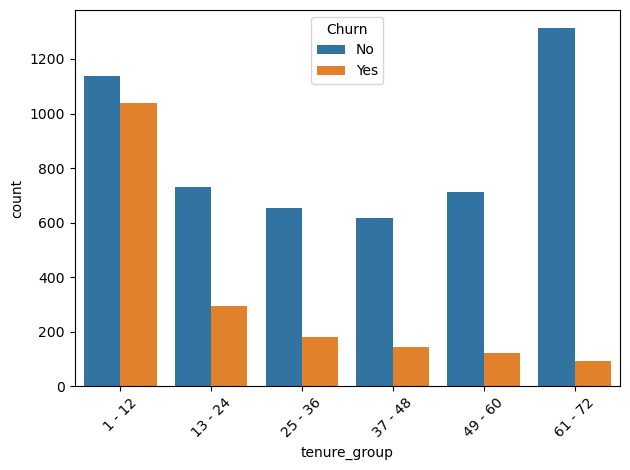

In [99]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')
    plt.xticks(rotation=45)   # rotate x-axis labels
    plt.tight_layout()  

In [101]:
# Step 1: Map Churn to 0/1 first
telco_data["Churn"] = telco_data["Churn"].map({"No": 0, "Yes": 1})
telco_data.head()




,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [105]:
# Convert all categorical variables into numeric
telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies.head()


,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


In [107]:
print(telco_data_dummies["Churn"].dtype)
print(telco_data_dummies["Churn"].unique())


int64
[0 1]


In [109]:
print(telco_data_dummies["Churn"].value_counts(dropna=False))


Churn
0    5163
1    1869
Name: count, dtype: int64


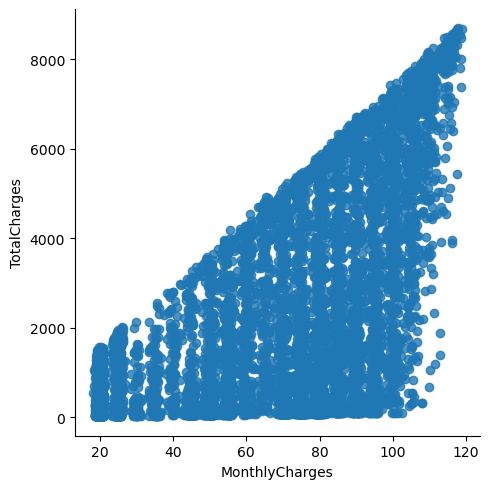

In [111]:
sns.lmplot(data=telco_data_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

In [ ]:
#Total Charges increase as Monthly Charges increase - as expected

C:\Users\Manjari\AppData\Local\Temp\ipykernel_28884\722082952.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0) ],
C:\Users\Manjari\AppData\Local\Temp\ipykernel_28884\722082952.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

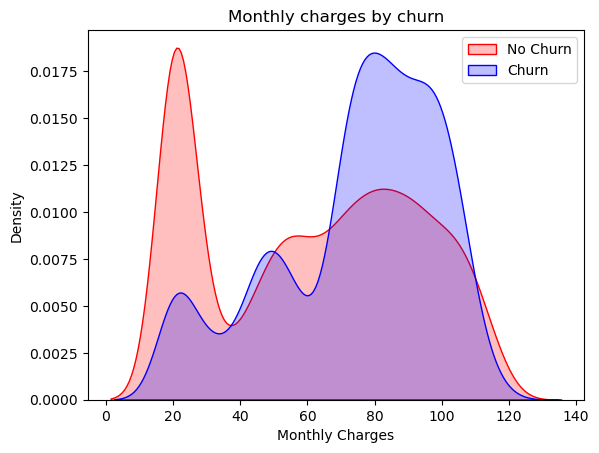

In [113]:
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

C:\Users\Manjari\AppData\Local\Temp\ipykernel_28884\4019118049.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
C:\Users\Manjari\AppData\Local\Temp\ipykernel_28884\4019118049.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

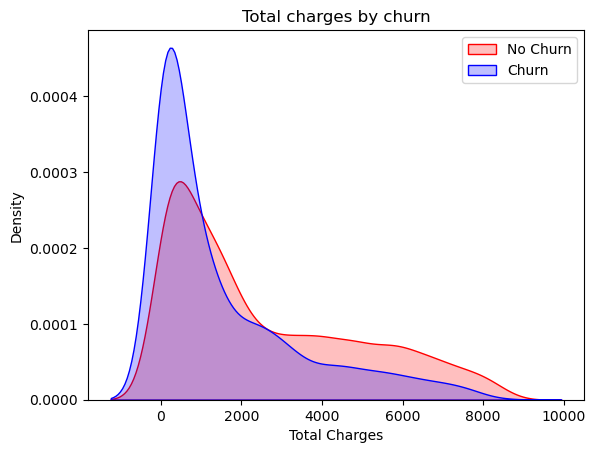

In [115]:
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

In [ ]:
**Surprising insight ** as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear 
:- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz 
Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

**11. Build a corelation of all predictors with 'Churn' **

<Axes: >

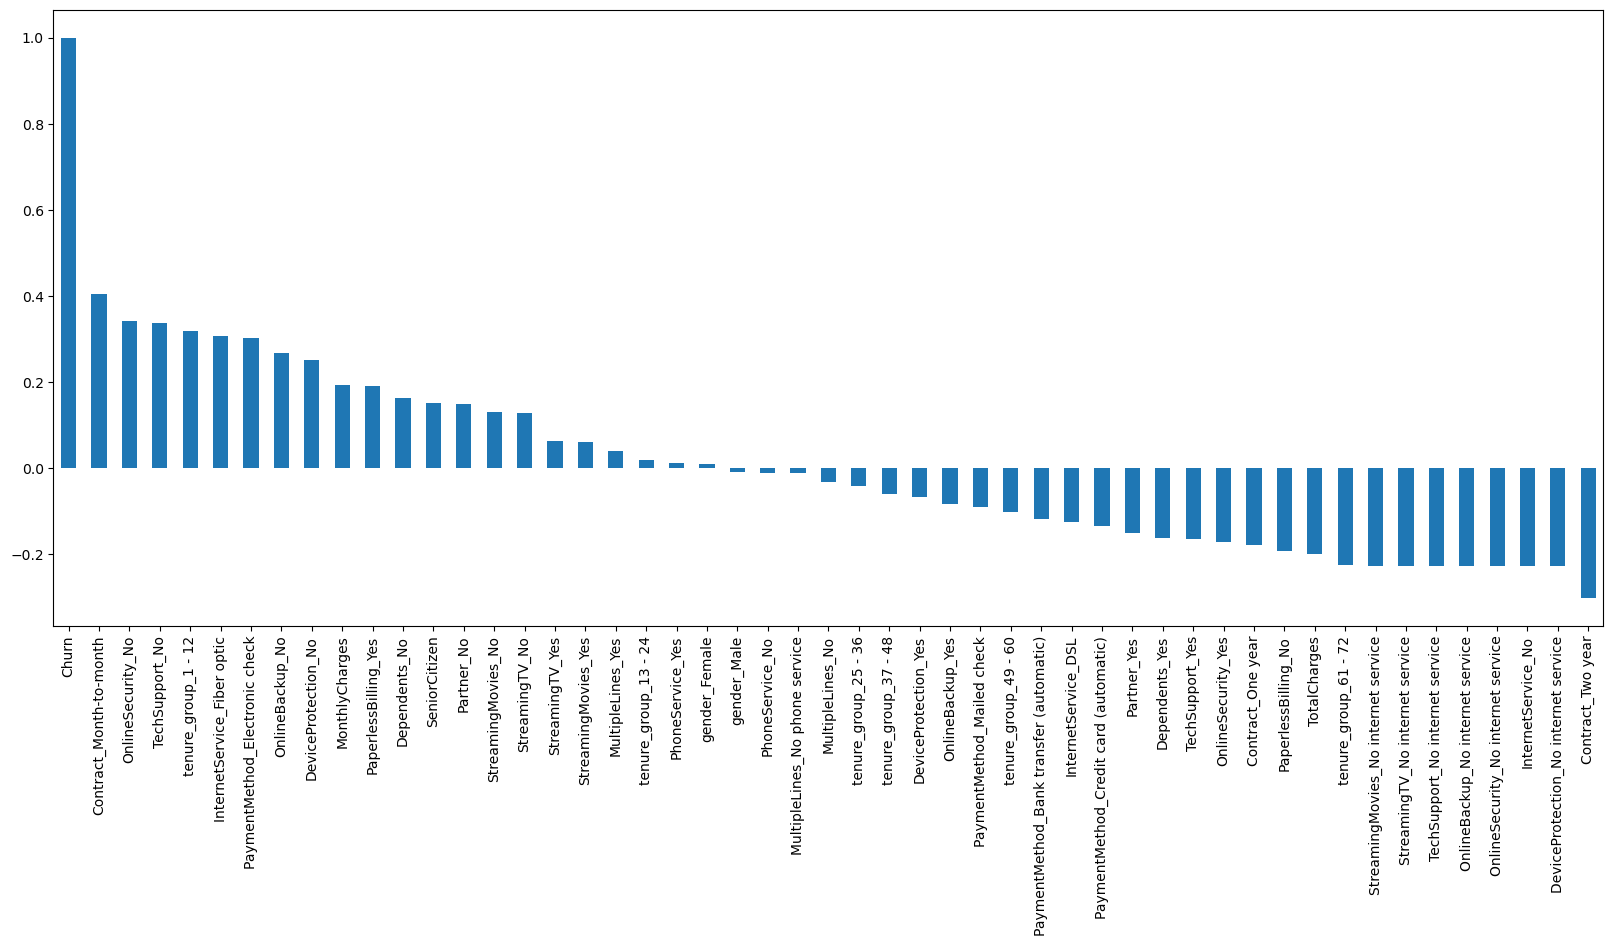

In [117]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [ ]:
**Derived Insight: **

HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

This is also evident from the Heatmap below

<Axes: >

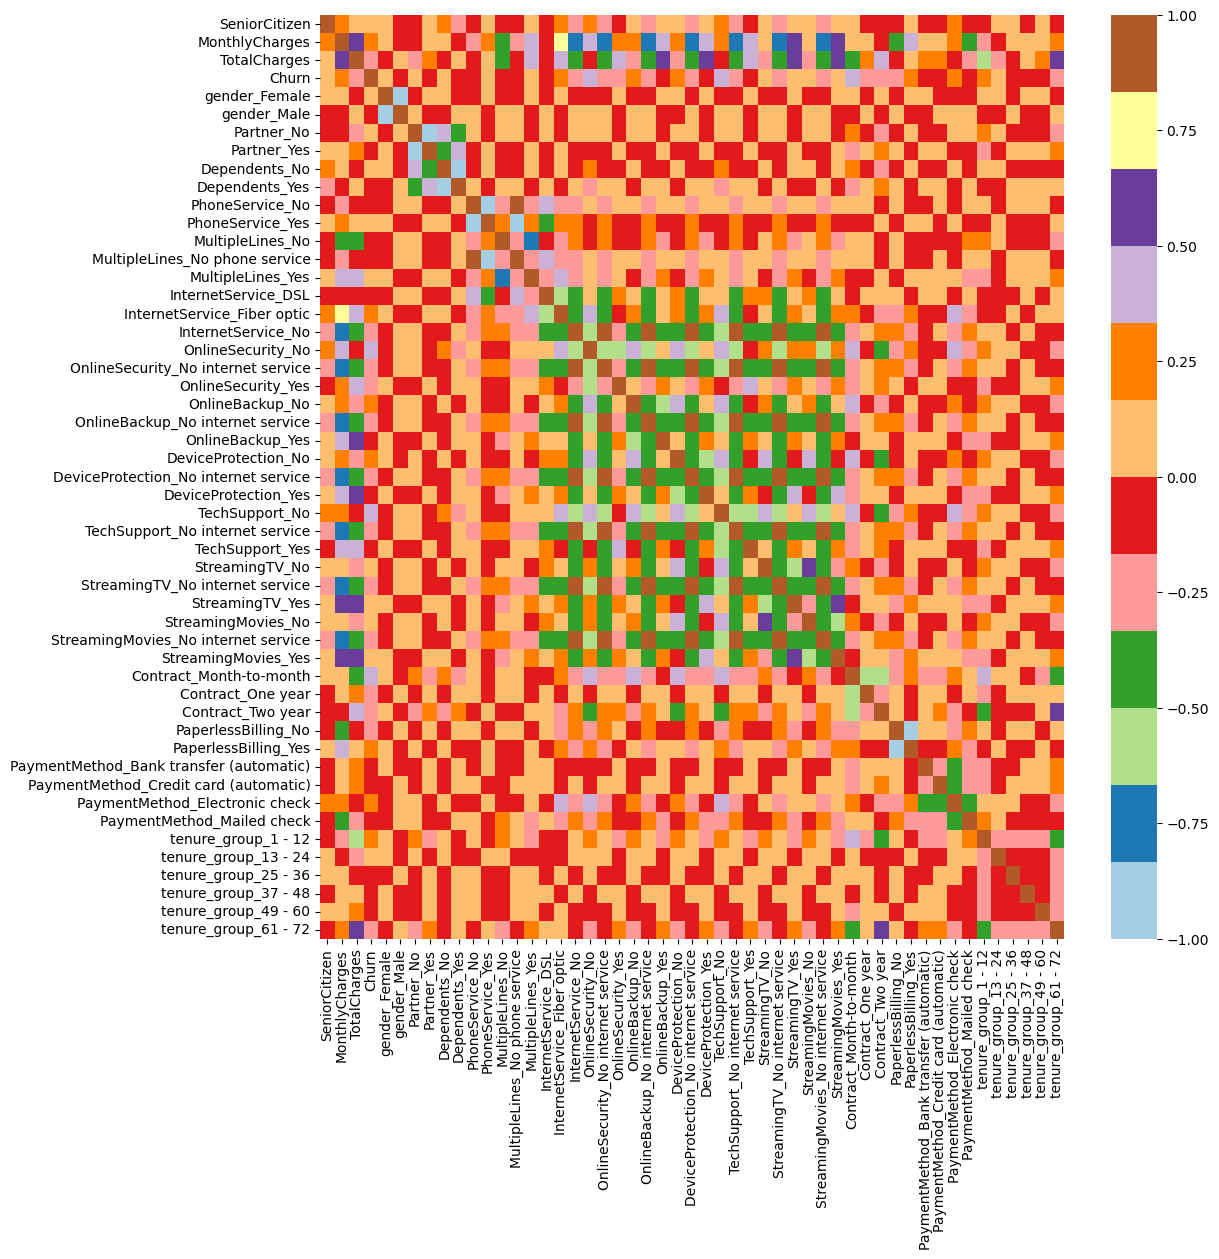

In [119]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr(), cmap="Paired")

In [ ]:
#Bivariate Analysis

In [121]:
new_df1_target0=telco_data.loc[telco_data["Churn"]==0]
new_df1_target1=telco_data.loc[telco_data["Churn"]==1]

In [123]:
telco_data["gender"].value_counts()

gender
Male      3549
Female    3483
Name: count, dtype: int64

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

def uniplot(df, col, title, hue=None, log_scale=False, normalize=False):
    """
    Flexible uniplot function for categorical variables.
    
    Parameters:
        df (DataFrame): dataset
        col (str): column for x-axis
        title (str): plot title
        hue (str): optional column for hue
        log_scale (bool): if True, y-axis will be log scale
        normalize (bool): if True, shows percentages instead of raw counts
    """
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    # Handle hue properly
    hue_levels = len(df[hue].unique()) if hue else 0

    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*hue_levels
    fig.set_size_inches(width, 8)

    plt.xticks(rotation=45)
    if log_scale:
        plt.yscale('log')
    plt.title(title)

    if normalize:
        # Compute normalized counts (percentages)
        if hue:
            counts = df.groupby([col, hue]).size().reset_index(name="count")
            counts["count"] = counts.groupby(col)["count"].transform(lambda x: x / x.sum() * 100)
            sns.barplot(data=counts, x=col, y="count", hue=hue, palette="bright", ax=ax)
            ax.set_ylabel("Percentage")
        else:
            counts = df[col].value_counts(normalize=True) * 100
            sns.barplot(x=counts.index, y=counts.values, palette="bright", ax=ax)
            ax.set_ylabel("Percentage")
    else:
        # Raw countplot
        #sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette="bright", ax=ax)
        sns.countplot(data=df, x=df[col].astype(str), order=df[col].astype(str).value_counts().index, hue=hue, palette="bright", ax=ax)

        ax.set_ylabel("Count")

    plt.show()


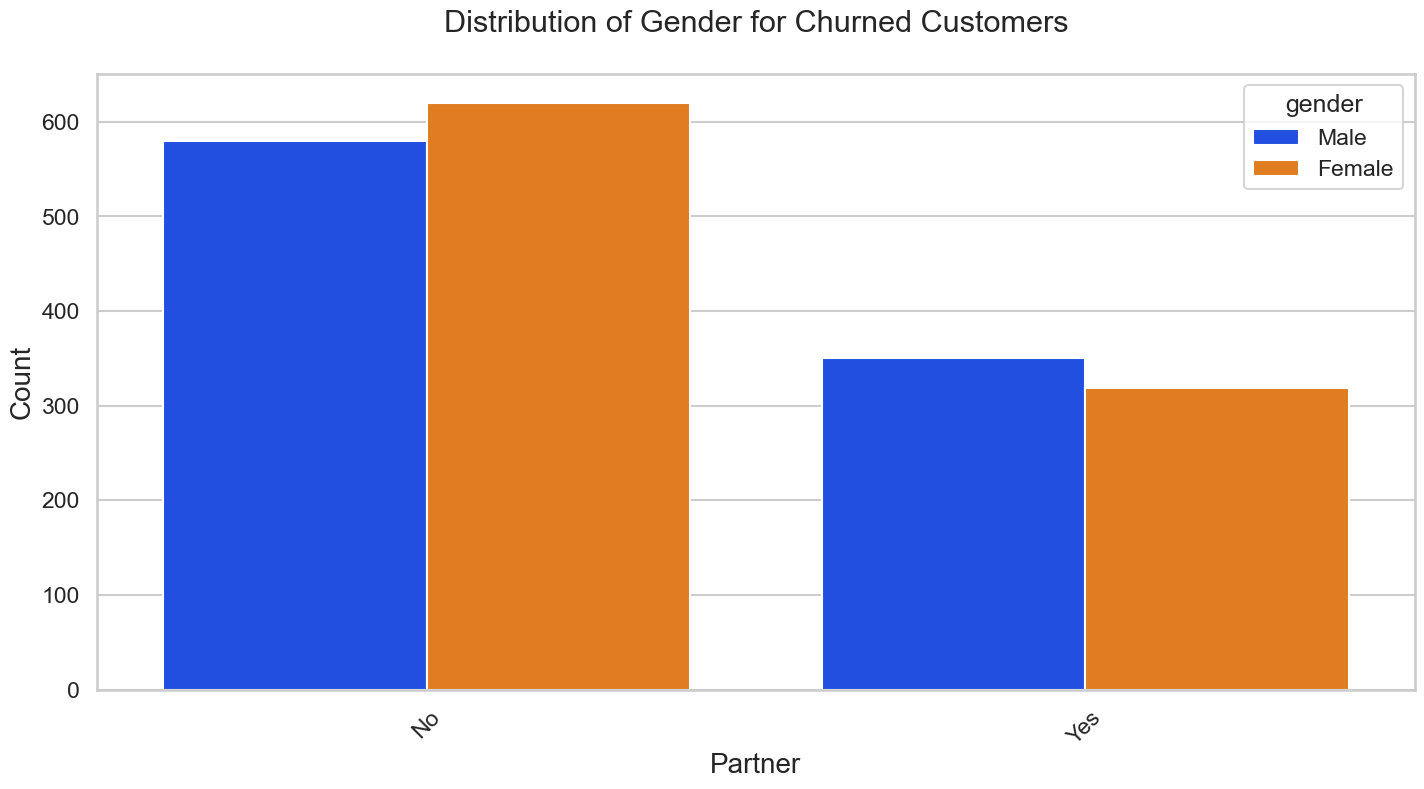

In [127]:
uniplot(new_df1_target1, 
        col='Partner', 
        title='Distribution of Gender for Churned Customers', 
        hue='gender')


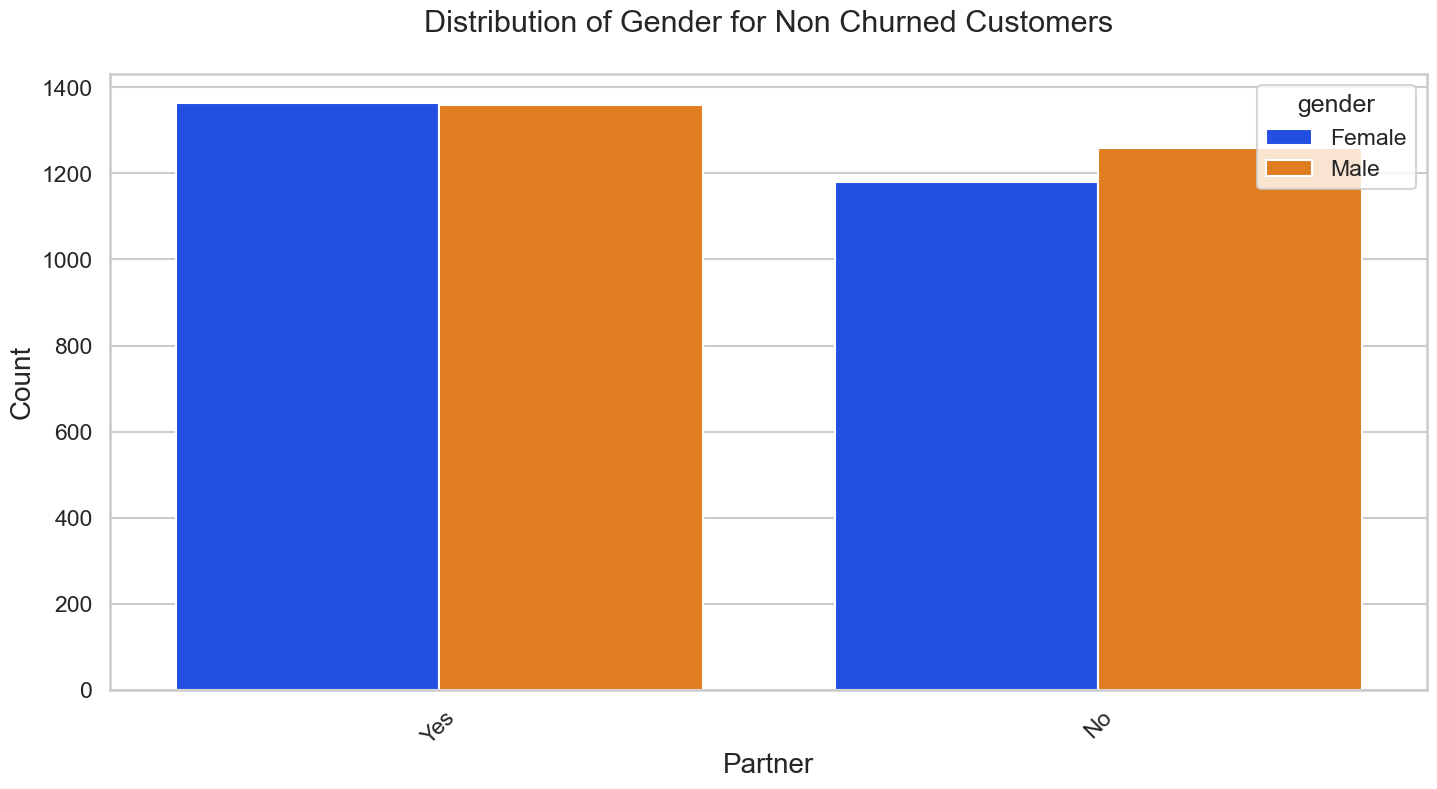

In [129]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

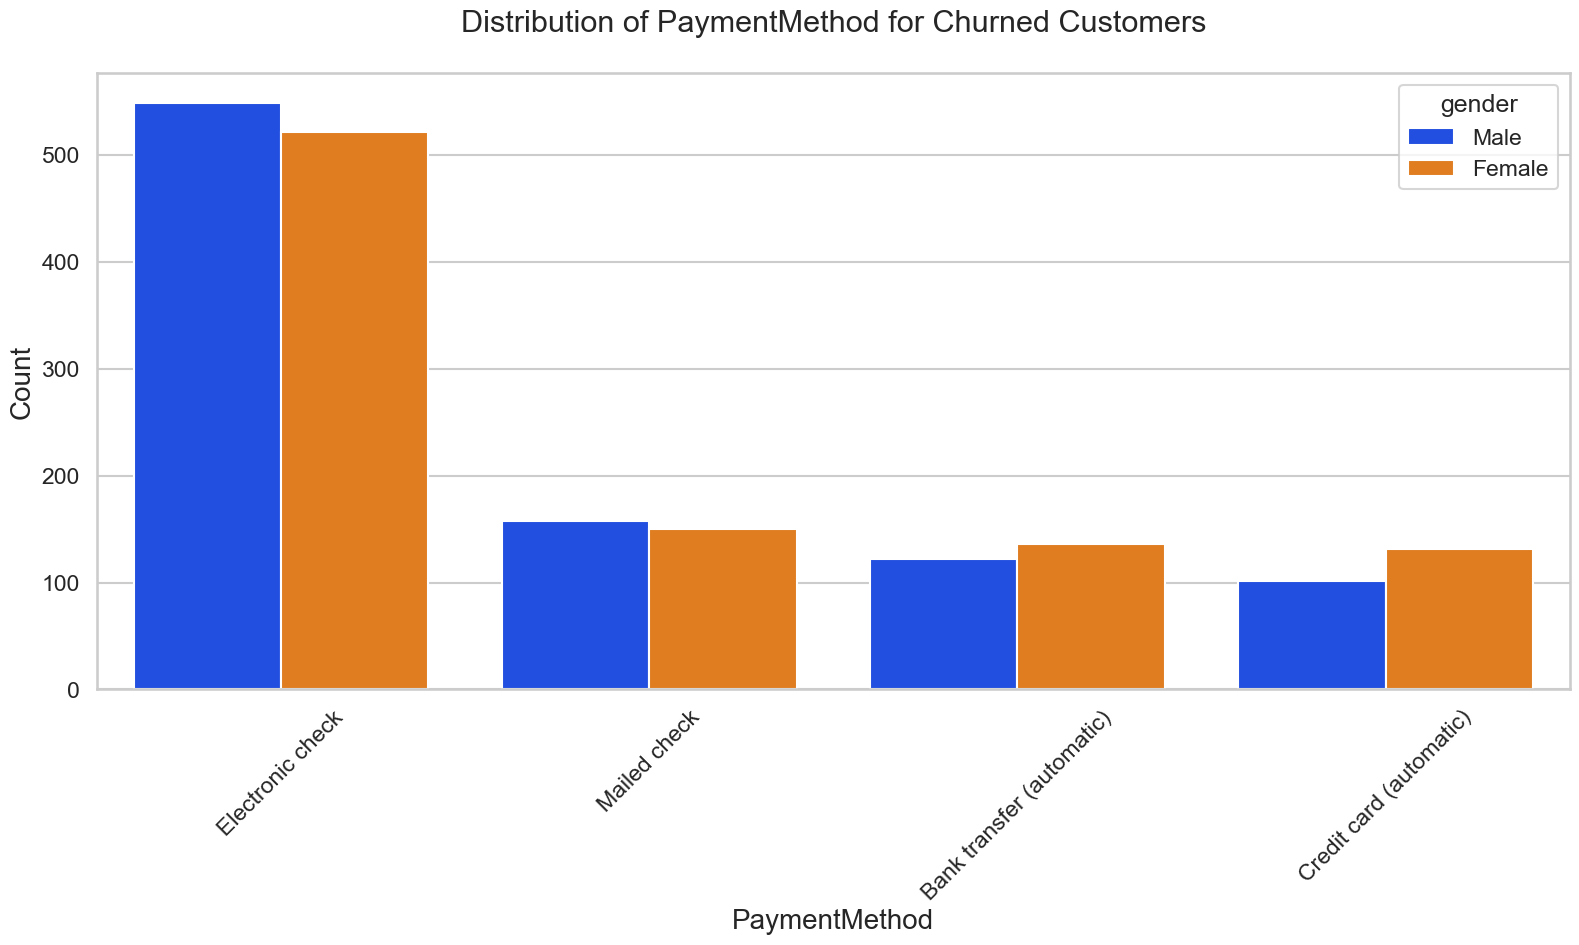

In [131]:

uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

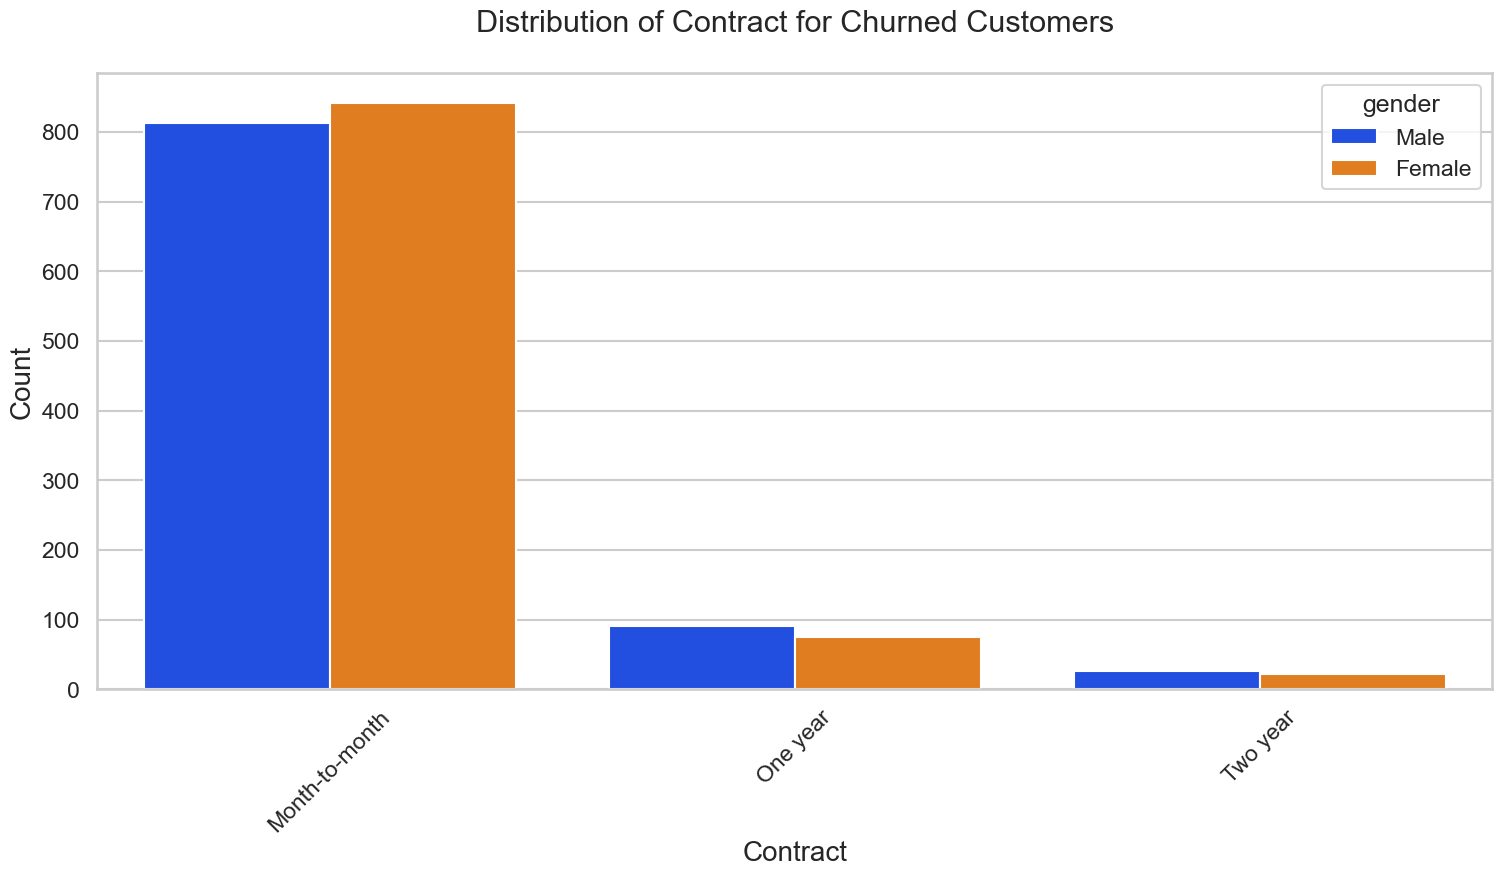

In [133]:

uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

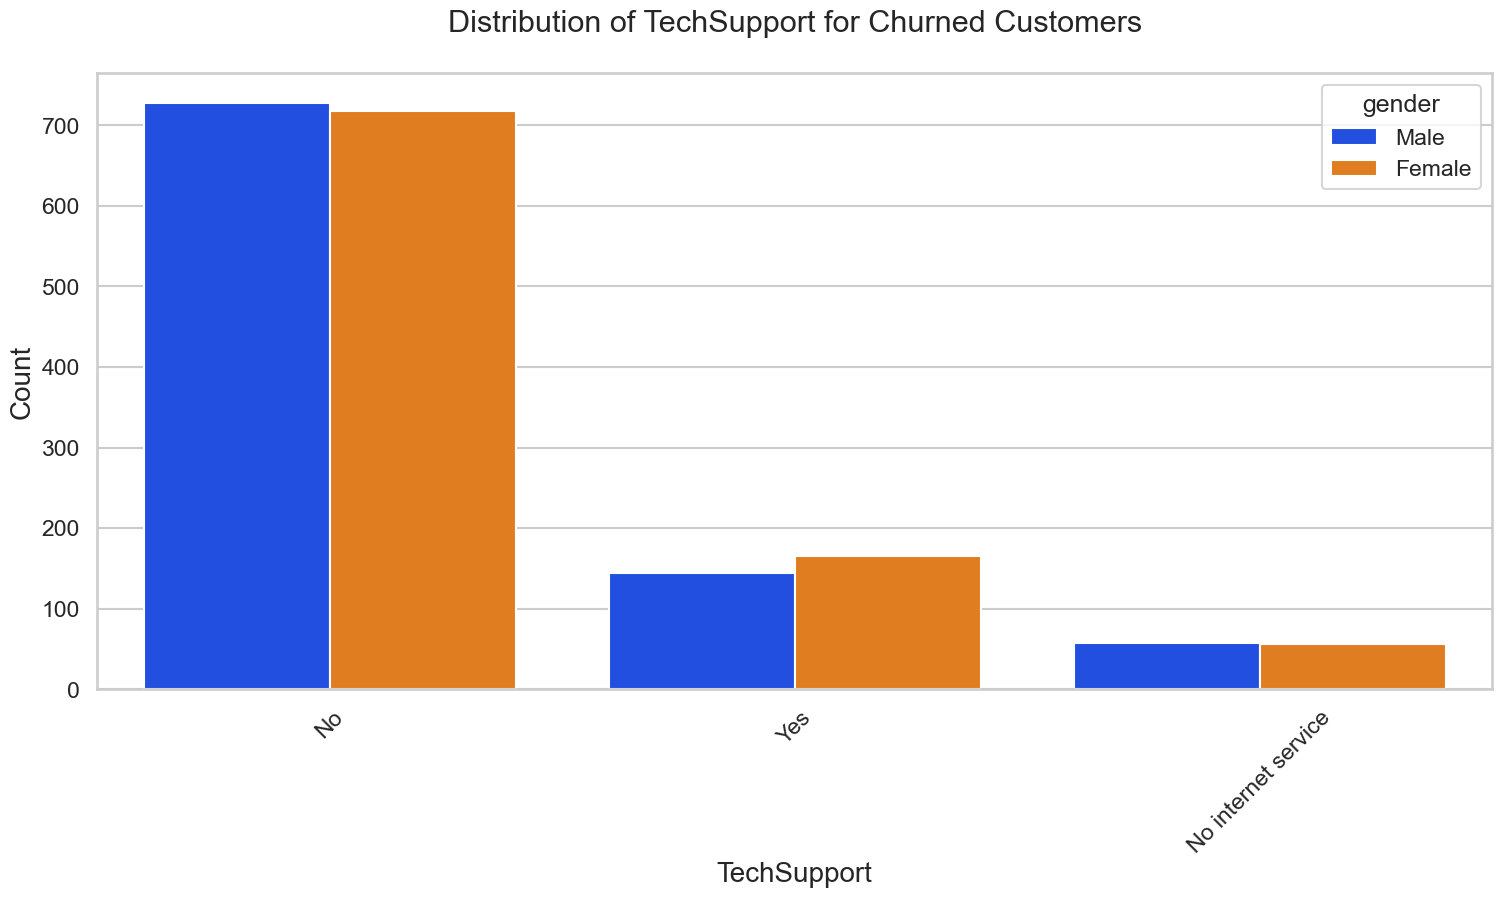

In [135]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

In [137]:
print(new_df1_target1["SeniorCitizen"].value_counts())
print(new_df1_target1.groupby(["SeniorCitizen", "gender"]).size())



SeniorCitizen
0    1393
1     476
Name: count, dtype: int64
SeniorCitizen  gender
0              Female    699
               Male      694
1              Female    240
               Male      236
dtype: int64


In [139]:
def uniplot(df, col, title, hue=None, normalize=False):
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    fig, ax = plt.subplots()
    fig.set_size_inches(10, 6)

    # Plot the countplot
    ax = sns.countplot(
        data=df,
        x=col,
        hue=hue,
        order=df[col].value_counts().index,
        palette='bright'
    )

    # Add counts and percentages on top of each bar
    total = len(df)
    for p in ax.patches:
        count = int(p.get_height())
        if normalize:
            percentage = f"{100 * count/total:.1f}%"
            ax.annotate(f"{count}\n{percentage}",
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=10)
        else:
            ax.annotate(f"{count}",
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=10)

    plt.xticks(rotation=45)
    plt.title(title)
    plt.show()


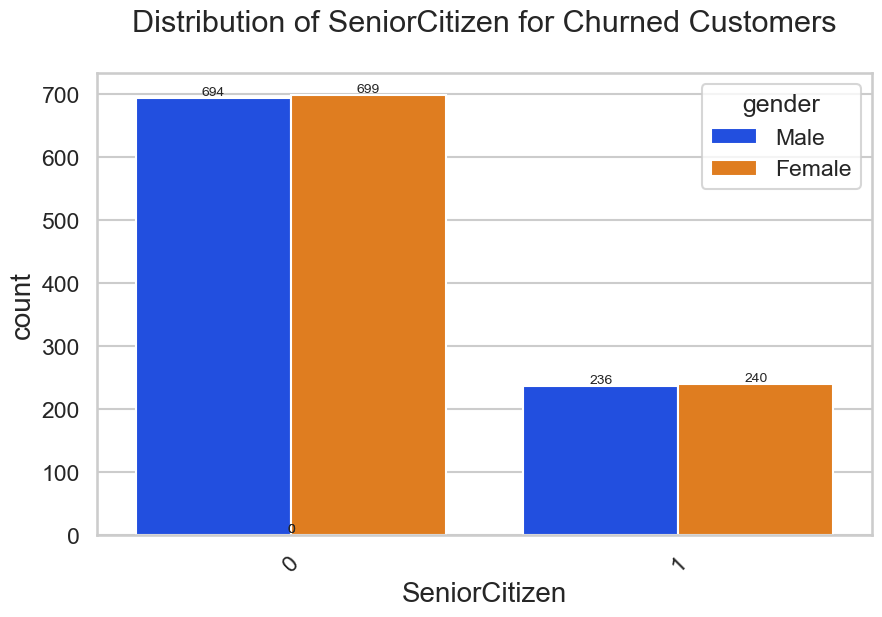

In [141]:
uniplot(new_df1_target1, col='SeniorCitizen',
        title='Distribution of SeniorCitizen for Churned Customers',
        hue='gender')


In [ ]:
'''These are some of the quick insights from this exercise:

Electronic check medium are the highest churners
Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
No Online security, No Tech Support category are high churners
Non senior Citizens are high churners
Note: There could be many more such insights, so take this as an assignment and try to get more insights :)

In [143]:
telco_data_dummies.to_csv('tel_churn.csv')

In [145]:
import os
print(os.getcwd())


C:\Users\Manjari


MODEL BUILDING

In [147]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [149]:
df=pd.read_csv(r"C:\Users\Manjari\tel_churn.csv")
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,True,False,False,True,True,...,False,False,True,False,True,False,False,False,False,False
1,1,0,56.95,1889.50,0,False,True,True,False,True,...,False,False,False,True,False,False,True,False,False,False
2,2,0,53.85,108.15,1,False,True,True,False,True,...,False,False,False,True,True,False,False,False,False,False
3,3,0,42.30,1840.75,0,False,True,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,4,0,70.70,151.65,1,True,False,True,False,True,...,False,False,True,False,True,False,False,False,False,False


In [151]:
df=df.drop('Unnamed: 0',axis=1)

In [153]:

x=df.drop('Churn',axis=1)
x.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,True,False,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,False,True,True,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,False,True,True,False,True,False,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,False,True,True,False,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,True,False,True,False,True,False,False,...,False,False,True,False,True,False,False,False,False,False


In [155]:
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

Train test split

In [157]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

Decision Tree Classifier

In [159]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [161]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [163]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [165]:
model_dt.score(x_test,y_test)

0.7853589196872779

In [167]:
print(confusion_matrix(y_test,y_pred))

[[926 101]
 [201 179]]


In [169]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1027
           1       0.64      0.47      0.54       380

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.77      1407



As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.
Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.
Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [171]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [173]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [175]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [177]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9288164665523156
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       521
           1       0.93      0.94      0.94       645

    accuracy                           0.93      1166
   macro avg       0.93      0.93      0.93      1166
weighted avg       0.93      0.93      0.93      1166



In [179]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[474  47]
 [ 36 609]]


Now we can see quite better results, i.e. Accuracy: 92 %, and a very good recall, precision & f1 score for minority class.
Let's try with some other classifier.

Random Forest Classifier

In [181]:

from sklearn.ensemble import RandomForestClassifier

In [183]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [185]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [189]:
y_pred=model_rf.predict(x_test)

In [191]:
model_rf.score(x_test,y_test)

0.7860696517412935

In [193]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1027
           1       0.66      0.43      0.52       380

    accuracy                           0.79      1407
   macro avg       0.74      0.67      0.69      1407
weighted avg       0.77      0.79      0.77      1407



In [195]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [197]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [199]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [201]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [203]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [205]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [207]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9321888412017167
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       525
           1       0.93      0.95      0.94       640

    accuracy                           0.93      1165
   macro avg       0.93      0.93      0.93      1165
weighted avg       0.93      0.93      0.93      1165



In [209]:

print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[478  47]
 [ 32 608]]


With RF Classifier, also we are able to get quite good results, infact better than Decision Tree. 

Saving the Model

In [214]:
import pickle

In [216]:
filename='model.sav'


In [220]:
pickle.dump(model_rf_smote,open(filename,'wb'))

In [222]:
load_model=pickle.load(open(filename,'rb'))

In [228]:
load_model.score(xr_test1,yr_test1)

0.9321888412017167

Performing PCA

In [242]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_
print("Total variance explained:", explained_variance.sum())

Total variance explained: 0.9998442348361692


In [244]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [246]:

model.fit(xr_train_pca,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [248]:

yr_predict_pca = model.predict(xr_test_pca)

In [250]:
model_score_r_pca = model.score(xr_test_pca, yr_test1)

In [252]:

print(model_score_r_pca)
print(metrics.classification_report(yr_test1, yr_predict_pca))

0.7253218884120172
              precision    recall  f1-score   support

           0       0.70      0.67      0.69       525
           1       0.74      0.77      0.75       640

    accuracy                           0.73      1165
   macro avg       0.72      0.72      0.72      1165
weighted avg       0.72      0.73      0.72      1165



With PCA, we couldn't see any better results, hence let's finalise the model which was created by RF Classifier, and save the model so that we can use it in a later stage :)